# TensorFlow - Keras ile Regresyon

Bu notebookta lineer regresyon verilerini modelleyen bir -deep learning- modeli yazmayı göstereceğim. Çok basit bir örnekle başlayalım.

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(42) # global seed

# TF 2.7 üstünde tf.keras.utils.set_random_seed() kullanılmalı.

print(tf.__version__)

2.5.0


## Lineer Regresyon

Lineer regresyon için basit bir örnekten başlayacağız. Basit bir lineer regresyonu şu şekilde tanımlayabiliriz: $y = ax + b$

Burada örnek olması için de modelleyeceğimiz veri şu şekilde olsun: $y = 2x + 1$. 

Yani modelin 2x + 1 ilişkisini yakalamasını isteyeceğiz.

In [2]:
x = tf.Variable(tf.range(0, 10))
x

<tf.Variable 'Variable:0' shape=(10,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [3]:
y = tf.Variable(2 * tf.range(0, 10) + 1)
y

<tf.Variable 'Variable:0' shape=(10,) dtype=int32, numpy=array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])>

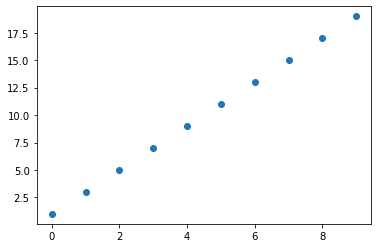

In [4]:
# Veriyi görselleştirerek lineer olduğunu görebiliriz.
plt.scatter(x.numpy(), y.numpy())

### Dense Layer nedir? Ne hesaplar?

Dense layer, neural networkte bulunan normal bir nöron katmanıdır. Her nöron, önceki katmandaki tüm nöronlardan girdi alır, böylece yoğun(dense) bir şekilde bağlanır. Katmanın bir ağırlık matrisi **W**, bir bias vektörü **b** ve önceki katman **a**'nın aktivasyonları vardır. Matematiksel olarak gösterecek olursak: 

$ y = Aktivasyon(Wx + b)$

Aktivasyon fonksiyonlarına ilerleyen bölümlerde değiniyor olacağız. Kısaca özetlemek gerekirse, aktivasyon fonksiyonları lineer olmayan ilişkileri modelin öğrenmesini sağlar.

In [5]:
# Lineer Regresyon için bir tane Dense layer yeterlidir.
# Aktivasyon kullanmadığımız için lineer bir dense layer olacak.

# Deep learningte ağırlıklar random oluşturulur. 
# Ağırlıkların randomluğu için -initializer- seed set ediyoruz.

# 1 tane çıktı olacağı için 1 neuron kullanmak yeterlidir.

initializer = tf.keras.initializers.GlorotUniform(seed = 13)

# Sequential ile modeli oluşturabiliriz. Bu şekilde layerlar stack gibi üst üste olacaktır.
# Model oluşturmanın iki yolu daha vardır
# 1) Functional API 
# 2) Model Subclassing
# onların detaylarına ilerde bakacağız. Şimdilik en basit olan Sequential ile ilerleyelim.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1,), # Örnek havuzumuzda her x bir y'ye denk geliyor.
                         kernel_initializer = initializer)])


# 2 tane parametre var. Birisi ağırlık matrisi, diğeri de bias.
# Modelleyeceğimiz ilişki ax + b şeklinde. Burada:
# a: Ağırklık matrisi
# b: Bias - Intercept
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Least squares regresyon için mean squared error loss fonksiyonu kullanacağız.
# Loss fonksiyonunu minimize etmek için stochastic gradient descent kullanıyoruz.
model.compile(loss = 'mse', optimizer = 'sgd')

# model.fit ile x'leri ve karşılık gelen y değerlerini modele veriyor ve
# 1000 epoch eğitiyoruz.
model.fit(x.numpy(), y.numpy(), epochs = 1000, verbose = 0)
print('Training bitti')

Training bitti


In [7]:
# Get weights ile ağırlık ve bias parametrelerini alabiliriz.

print('Modelin öğrendiği a değeri: ', model.get_weights()[0].flatten()) # ağırlık matrisi
print('Modelin öğrendiği b değeri: ', model.get_weights()[1].flatten()) # bias

a = np.squeeze(model.get_weights()[0], axis = -1)
b = np.squeeze(model.get_weights()[1], axis = -1)

# Gerçek değerlere yakın öğrenmiş. İstediğimiz fonksiyon 2x + 1'di. Yani ax + b

Modelin öğrendiği a değeri:  [2.0004976]
Modelin öğrendiği b değeri:  [0.99687916]


In [8]:
# 2x + 1 = 2(21) + 1 = 43
tahmin = model.predict(tf.convert_to_tensor([21]))
print('Model tahmini: ', tahmin)

print('Model ağırlıklarını kullanarak tahmini hesaplama %.5f' %(a[0] * 21 + b))

Model tahmini:  [[43.007328]]
Model ağırlıklarını kullanarak tahmini hesaplama 43.00733


### Aynı Model, Farklı Veri

Şimdi aynı yazdığımız modeli veriyi büyüterek tekrardan `fit()` edelim. Veri ilişkisi açışından değişen bir şey olmayacak, modelleyeceğimiz şey yine aynı. Vereceğimiz x'lerin 2 katının 1 fazlası yine y değerimiz olacak.

x:  tf.Tensor([  0 100 200], shape=(3,), dtype=int32)
y:  tf.Tensor([  1 201 401], shape=(3,), dtype=int32)


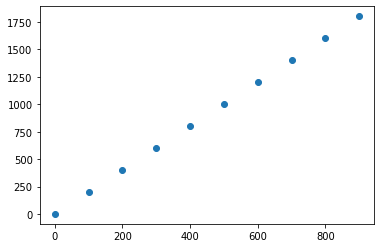

In [9]:
x = tf.Variable(100 * (tf.range(0, 10)))
y = tf.Variable(100 * (2 * tf.range(0, 10)) + 1)

print('x: ', x[:3])
print('y: ', y[:3])

plt.scatter(x.numpy(), y.numpy())
plt.show()

In [10]:
# Aynı şekilde oluşturalım.
initializer = tf.keras.initializers.GlorotUniform(seed = 13)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1,),
                         kernel_initializer = initializer)])

model.compile(loss = 'mse', optimizer = 'sgd')

model.fit(x.numpy(), y.numpy(), epochs = 1000, verbose = 0)
print('Training bitti')

Training bitti


In [11]:
tahmin = model.predict(tf.convert_to_tensor([21]))
print('Model tahmini: ', tahmin)

Model tahmini:  [[nan]]


In [12]:
print('Modelin öğrendiği a değeri: ', model.get_weights()[0].flatten())
print('Modelin öğrendiği b değeri: ', model.get_weights()[1].flatten())

Modelin öğrendiği a değeri:  [nan]
Modelin öğrendiği b değeri:  [nan]


Modelin tahmini ve ağırlıkları tamamen patlamış halde görünüyor.

Değişen tek şey verinin büyüklüğüydü. Aynı veriyi küçük sayılarla modele verince net bir şekilde öğrenmişti.

$[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]$ -- $[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]$ --> OK


$[   0, 100, 200, 300, 400, 500, 600, 700, 800, 900]$ -- $[    1,  201,  401,  601,  801, 1001, 1201, 1401, 1601, 1801]$ --> Sıkıntı var

Önce problemin ne olduğuna değinelim. Buna `gradient explosion` veya `patlayan gradyanlar` diyebiliriz.

Gradyan tabanlı öğrenme ve geri yayılım(backpropagation) ile bir modeli eğitirken, modelin son katmanından ilk katmanına geçerek kısmi türevleri buluruz. Zincir kuralını kullanarak, modelde bulunan katmanların(layerlar) türevlerinin hesaplanması için sürekli matris çarpımlarından geçerler.

**n** tane gizli katmandan(hidden layers) oluşan bir modelde, **n** tane türev birlikte çarpılacaktır. Türevler **büyükse**, sonunda gradyanlar katlanarak artacaktır. Buna patlayan gradyan sorunu denir.

# Patlayan Gradyanlar ile Başa Çıkma Yöntemleri
* **Gradyanları Kırpma(Gradient Clipping)**
  * `clipvalue`
  * `clipnorm`
* **Adaptive Optimizer Kullanmak**

gibi sıralanabilir.

## Gradient Clipping
### **Clip Value**

Bir gradyan değeri negatif bir eşikten küçük veya pozitif bir eşikten fazlaysa, loss fonksiyonunun türevlerinin belirli bir değere sahip olacak şekilde kırpılmasıdır diyebiliriz.

Örneğin, 0.2'lik bir değer belirleyebiliriz. Böylece gradyanın değeri -0.2'den küçükse -0.2'ye ayarlanır veya tam tersi 0.2'den büyükse 0.2'ye ayarlanır.

### **Clip Norm**

Norma göre kırpmanın arkasındaki fikir, değere(clip value) göre kırpmayla benzerlik gösterir. Aradaki fark, gradyanların birim vektörünü bir threshold ile çarparak kırpmaktır.

In [13]:
# Aynı şekilde oluşturalım.

initializer = tf.keras.initializers.GlorotUniform(seed = 13)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1,),
                         kernel_initializer = initializer)])

#clipvalue için SGD optimizer'ından object oluşturmak gerekli.
optimizer = tf.keras.optimizers.SGD(clipvalue=0.4, clipnorm = 0.2)
model.compile(loss = 'mse', optimizer = optimizer)

model.fit(x.numpy(), y.numpy(), epochs = 1000, verbose = 0)
print('Training bitti')

# 43'e yakın bir değer çıkmasını bekliyoruz.
tahmin = model.predict(tf.convert_to_tensor([21]))
print('Model tahmini: ', tahmin)

Training bitti
Model tahmini:  [[42.548916]]


In [14]:
# Öğrenilen değerlere bakalım.
print('Modelin öğrendiği a değeri: ', model.get_weights()[0].flatten())
print('Modelin öğrendiği b değeri: ', model.get_weights()[1].flatten())

Modelin öğrendiği a değeri:  [2.0027103]
Modelin öğrendiği b değeri:  [0.49200064]


Gradyan kırpma yöntemi işe yaradı. `clipvalue` parametresinin değerinin seçimi size kalmış bir şeydir, deneme yanılma yapabilirsiniz.

## Adaptive Optimizer Kullanmak
### Uyarlanabilir Optimizasyon - Adaptive Optimization
Gradient Descent, SGD, mini-batch Gradient Descent gibi optimizasyon tekniklerinde modeli eğitmeden önce bir hiperparametre olan `learning_rate`'i ayarlamamız gerekir. Yukarda SGD kullanırken aslında default bir LR kullanıyorduk ve bunun değeri 0.1'di. Seçilen `learning_rate` iyi sonuçlar vermezse bunu değiştirmemiz ve modeli yeniden eğitmemiz gerekir. Deep learning eğitim süreci genellikle zaman alır. Bazı araştırmacılar `learning_rate` ayarlamaktan bıkınca uyarlanabilir optimizasyon tekniklerine başvurdular. Uyarlanabilir optimizasyon algoritmaları, model eğitilirken `learning_rate`'i bizim için güncelliyor. Normal SGD'de `learning_rate` hep sabit kalıyor.

### **Adam – Adaptive Moment Estimation**

Adam optimizer'ı matematiğine girerek anlatmak istiyorum. Makalesine [buradan](https://arxiv.org/pdf/1412.6980.pdf) ulaşabilirsiniz.

Stokastik optimizasyon, rastgeleliği hesaba katarak bir fonksiyonunu optimize etme sürecidir. Bunun için *Stochastic Gradient Descent*'i ele alalım. SGD, çok fazla veriye ve parametreye sahip olduğumuzda optimizasyon anlamında güzel iş çıkarır. Her adımda tüm veri setini işleyen alan Gradient Descent'in aksine, her adımda SGD bu verilerin rastgele bir alt kümesinden (mini-batch) gradyanın bir tahminini hesaplar.

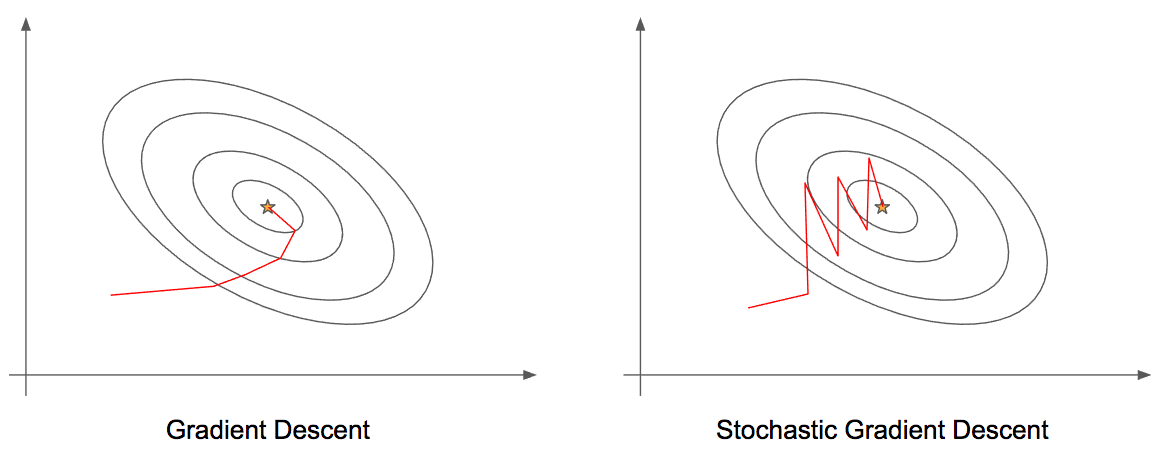

SGD, batchler halinde update yaptığı için daha az stabildir. 


Adam optimizer'a tam olarak geçmeden önce bahsetmek istediğim iki tane algoritma var:
* AdaGrad
* RMSProp

Bu iki algoritma adaptive optimizasyon tekniğini uygularlar. Adam ise bu iki algoritmanın avantajını bir araya getirir. Önce bu iki algoritmaya bir göz atalım.

#### **AdaGrad(Adaptive Gradient Algorithm)**: 
RMSprop'a çok benzeyen ve yine adaptive `learning_rate` yaklaşımını benimseyen bir algoritmadır. Adagrad, her boyuttaki gradyanların karelerin toplamına dayalı olarak gradyanların öğe bazında ölçeklenmesini ekler. Bu, gradyanların karelerinin devamlı bir toplamını tuttuğumuz anlamına gelir. `learning_rate`'i bu toplama bölerek uyarlarız(*adapt*). Matematiksel olarak şu şekilde özetleyebiliriz:

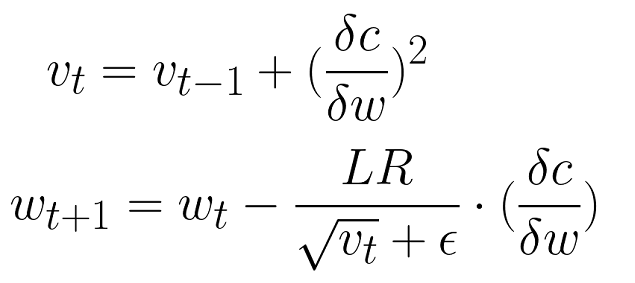

#### **RMSProp(Root Mean Square Propagation)**: 
RMSProp algoritmasında learning rate son gradyanların büyüklüklerinin hareketli ortalamasına(moving average) göre uyarlanır. Bu şekilde son gradyanlara daha fazla ağırlık verilmiş olur. Bunu matematiksel formüle dökecek olursak:

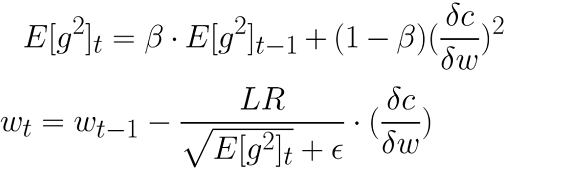

* **E[g]** = Karesi alınan gradyanların hareketli ortalaması
* **deltaC / deltaW** = Cost'un ağırlıklara göre gradyanı
* **LR** = Learning rate
* $B$ = Hareketli ortalama parametresi(varsayılan 0.9).
* **epsilon**: Sıfıra bölmediğimizden emin olmak için. Çok küçük bir sayıdır.

Yukarıdaki formülden de görebileceğiniz gibi, `learning rate`'i karesi alınmış gradyanın köküne bölerek uyarlıyoruz(*adapt*). Batchler halinde eğitim yaptığımız ve mevcut batchte de sadece gradyan tahminine sahip olduğumuz için hareketli ortalama kullanmamız gerekiyor.


Bu iki algoritmanın SGD'den farkını görmek için aşağıdaki GIF yeterli olacaktır. (Kaynak: https://i.imgur.com/NKsFHJb.gif)

![image-2.gif](https://i.imgur.com/NKsFHJb.gif)

AdaGrad ve RMSProp yolunu çok daha hızlı buluyor. SGD ise yavaş kalıyor. 

Gördüğünüz gibi saddle point ile karşılaşılması durumunda RMSprop doğrudan aşağı iniyor. Yani gradyanların ne kadar küçük olduğu önemli değildir çünkü RMSprop `learning_rate`'i duruma adapte eder. Böylece saddle point durumlarından daha hızlı sıyrılır.

Aşağıdaki GIF ise çok büyük gradyanlarla başladığımızda algoritmaların durumunu gösteriyor. (Kaynak: https://imgur.com/a/Hqolp#NKsFHJb)

![image-99.gif](https://i.imgur.com/pD0hWu5.gif)

RMSProp en optimal yolu bulurken, AdaGrad bir anlığına stabilitesini yitiriyor. Momentum ise minimumu çoğu kez ıskalıyor.

#### Adam

Çok popüler olan ve birçok modelde optimizer olarak kullanılan Adam, bir birleşimdir. Kısaca Adam, networkteki herhangi bir parametreyi kendine özgü `learning_rate` ile günceller. Bu da networkteki her parametrenin belirli bir `learning_rate`'e sahip olduğu anlamına gelir. Ayrıca Adam da `learning_rate`'ini zamanla adapte edecektir.

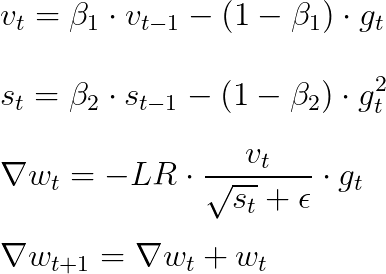

* **g**: Gradyan
* **v_{t} ve s_{t}**: Gradyanların üstel ortalamasıdır. (s_t karesi)


Moment kavramına girmeden önce formülünü vermek istiyorum. Random bir değerin N. momenti, onun N.kuvvetinin beklenen değeridir(*expected value*)
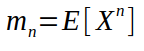

Adam optimizer geçmiş gradyanların birinci ve ikinci momentlerinden mevcut gradyanı hesaplamak için adaptive learning rate tekniğini kullanır. 

RMSProp'ta olduğu gibi ilk momente göre öğrenme oranını adapte etmek yerine, gradyanların ikinci momentlerinin ortalamasını da kullanır. Ayrıca Adam, gradyanların karesini ve üstel hareketli ortalamasını da hesaplar. Bu nedenle Adam, **AdaGrad ve RMSProp'un bir kombinasyonu olarak düşünülebilir**.

Formülde bulunan $B$ değerleri sırasıyla birinci ve ikinci momentlere göre üstel azalma hızıdır(*decay rate*). Algoritma yazarları bunların varsayılan değerlerini 0.9 ve 0.999 olarak önermiştir.

Nasıl implemente edildiğini görmek isterseniz [kaynak koduna buradan](https://github.com/tensorflow/tensorflow/blob/754048a0453a04a761e112ae5d99c149eb9910dd/tensorflow/python/training/adam.py#L141) ulaşabilirsiniz.

In [15]:
# Aynı şekilde oluşturalım.
initializer = tf.keras.initializers.GlorotUniform(seed = 13)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (1,),
                         kernel_initializer = initializer)])

# Adam optimizer kullanalım.
optimizer = tf.keras.optimizers.Adam()
model.compile(loss = 'mse', optimizer = optimizer)

model.fit(x.numpy(), y.numpy(), epochs = 1000, verbose = 0)
print('Training bitti')

# 43'e yakın bir değer çıkmasını bekliyoruz.
tahmin = model.predict(tf.convert_to_tensor([21]))
print('Model tahmini: ', tahmin)

Training bitti
Model tahmini:  [[42.246613]]


In [16]:
# Öğrenilen değerlere bakalım.
print('Modelin öğrendiği a değeri: ', model.get_weights()[0].flatten())
print('Modelin öğrendiği b değeri: ', model.get_weights()[1].flatten())

Modelin öğrendiği a değeri:  [1.9889362]
Modelin öğrendiği b değeri:  [0.47895396]


Görüldüğü üzere Adam varsayılan değerleri ile patlayan gradyan sorununa çözüm olmuştur.

## Modele Ekleme Yapmak

In [17]:
# İki tane dense layer sonucu iyileştirebilir mi?
tf.keras.backend.clear_session()
initializer = tf.keras.initializers.GlorotUniform(seed = 13)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape = (1,),
                         kernel_initializer = initializer),
    
    tf.keras.layers.Dense(1)])

# Adam optimizer kullanalım.
optimizer = tf.keras.optimizers.Adam()
model2.compile(loss = 'mse', optimizer = optimizer)

model2.fit(x.numpy(), y.numpy(), epochs = 1000, verbose = 0)
print('Training bitti')

# 43'e yakın bir değer çıkmasını bekliyoruz.
tahmin = model2(tf.convert_to_tensor([[21]])) # Predict yerine feed-forward da yapabiliriz. Detaylarına daha sonra değineceğiz.
print('Model tahmini: ', tahmin)

Training bitti
Model tahmini:  tf.Tensor([[43.22012]], shape=(1, 1), dtype=float32)


Fazladan dense layer kullanmak modeli daha iyi hale getirdi:) 

Bunu şu şekilde açıklayabiliriz, daha önce 1 tane layerımız vardı şimdi ise 2 tane layerımız var. Yani modeli daha kompleks hale getirmiş olduk. Bu şekilde model, veriyi daha iyi kavrayabildi. Tabi ki pratikte bu her zaman böyle değildir. Daha kompleks modeller her zaman daha iyi olacak diye bir kural yok.